In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('/content/aerofit.csv')

In [3]:
print(df.shape)
df.head()

(180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


**Characteristic of Data**

In [10]:
df['Product'].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [12]:
df['Gender'].value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

In [11]:
# pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

In [13]:
def distribution(col_names):
  return pd.crosstab(index=df[col_names],columns=df['Product'],margins=True)

In [14]:
distribution('Gender')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [15]:
distribution('Age')

Product,KP281,KP481,KP781,All
Age,,,,
18,1,0,0,1
19,3,1,0,4
20,2,3,0,5
21,4,3,0,7
22,4,0,3,7
23,8,7,3,18
24,5,3,4,12
25,7,11,7,25
26,7,3,2,12


In [16]:
distribution('Education')

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


In [17]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [19]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**Observations:**
1.Minimum and Mac age of customer is 18 and 50.
 Mean age is 28.78
 Median age is 26

2.Minimum and Maximum years of education is 12 and 21
 mean education is 15.57
 median education is 16

3.Minimum and Max no of times the treadmill used is 2 and 7 days per week
 mean no of times the treadmill used is 3.45 days
median no of times usage is 3.0

4.Minimum and Maximum rating of fitness is 1 to 5
 mean fitness rating is 3.3
 median fitness rating is 3.0

5.Minimum and Max income of customers lie between 29562$ and 104581$
  median income is 50596.5$

6.Minimum and Max miles walked each week is 21 and 360 miles
 Mean walk on treadmill is 103 miles

7.there are 104 males and 76 females of total count

8.Here the Std dev for Income and Miles is very high which indicates that there might be outliers.

**Univariate Analysis**
Understanding the distribution of the data for the quantitative attributes.

In [20]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


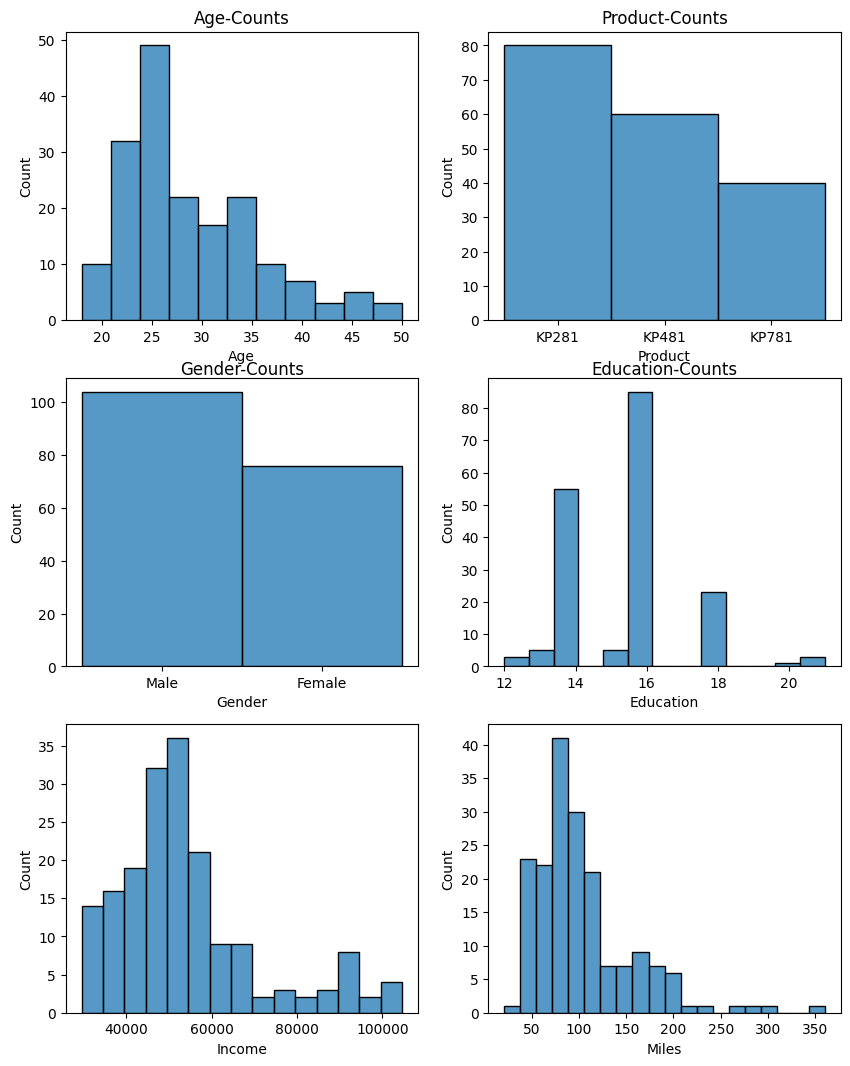

In [21]:
# Creta a subplot with 3 rows and 2 cols
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
fig.subplots_adjust(top=1.2)

sns.histplot(data = df, x='Age', ax=axes[0,0])
sns.histplot(data=df,x='Product',ax=axes[0,1])
sns.histplot(data=df,x='Gender',ax=axes[1,0])
sns.histplot(data=df,x='Education',ax=axes[1,1])
sns.histplot(data=df,x='Income',ax=axes[2,0])
sns.histplot(data=df,x='Miles',ax=axes[2,1])
axes[0,0].set_title('Age-Counts')
axes[0,1].set_title('Product-Counts')
axes[1,0].set_title('Gender-Counts',pad=0)
axes[1,1].set_title('Education-Counts',pad=0)
plt.show()

**Outliers Treatment Using boxplot**

In [22]:
import statistics
def find_anamoloies(df):
  anamolies=[] #defined a list to collect outlier

  # Set up upper and lower limit to 3 standard deviation
  r_data_mean = statistics.mean(df)
  r_data_std = statistics.stdev(df)

  anamoly_cut_off = r_data_std*3

  lower_limit = r_data_mean - anamoly_cut_off
  upper_limit = r_data_mean + anamoly_cut_off

  # Generate outlier
  for outlier in df:
    if outlier > upper_limit or outlier < lower_limit:
      anamolies.append(outlier)
  return anamolies

In [23]:
find_anamoloies(df['Income'])

[103336, 104581, 104581]

In [24]:
find_anamoloies(df['Miles'])

[300, 280, 260, 360]

In [25]:
find_anamoloies(df['Age'])

[50]

In [26]:
find_anamoloies(df['Education'])

[21, 21, 21]

In [27]:
find_anamoloies(df['Usage'])

[7, 7]

**Observations:**


*  Age, Education and Usage are having very few outliers.

*  While Income and Miles are having more outliers.




**Understanding the distribution of the data for the qualitative attributes**

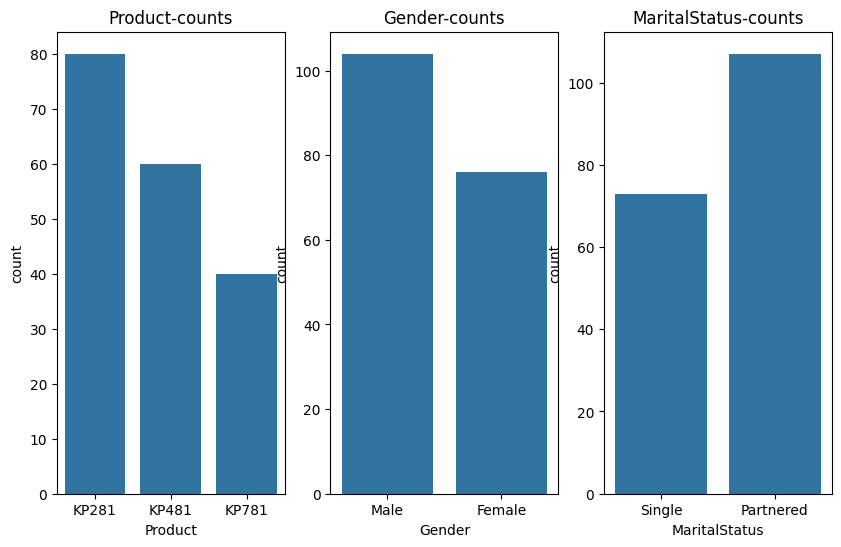

In [28]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
sns.countplot(data=df, x='Product', ax=axis[0])
sns.countplot(data=df, x='Gender', ax=axis[1])
sns.countplot(data=df, x='MaritalStatus', ax=axis[2])

axis[0].set_title('Product-counts')
axis[1].set_title('Gender-counts')
axis[2].set_title('MaritalStatus-counts')

plt.show()

**Observation:**
1. KP281 is the frequently bought product.
2. There are more males in the data than the females.
3. More Partnered people are present in the data.

In [29]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [43]:
# df['Usage'].value_counts()

In [42]:
# df['Gender'].value_counts(normalize=True)*100

In [41]:
# df['Product'].value_counts()

In [44]:
# df['Product'].unique()

In [ ]:
# df['Age'].value_counts()

In [46]:
# df.dtypes

In [45]:
# Probability
# pd.crosstab(index=df['Gender'],columns=df['Product'])

In [48]:
# # def distribution(col_name):
#   return df[col_name].value_counts(normalize = True)*100

In [49]:
# distribution('Gender')

In [50]:
# distribution('Product')

In [55]:
# def cross_tab(x):
  # return pd.crosstab(index=df[x],columns=df['Product'],margins=True)

In [56]:
# cross_tab('Gender')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [40]:
def p_prod_given_gender(gender, print_marginal=False):
  if gender is not "Female" and gender is not "Male":
    return "Invalid gender value."

  df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
  p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
  p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
  p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

  if print_marginal:
    print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
    print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

  print(f"P(KP781/{gender}): {p_781:.2f}")
  print(f"P(KP481/{gender}): {p_481:.2f}")
  print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-40-374c375a6b1f>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
<ipython-input-40-374c375a6b1f>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
